# Tweet Sentimement Analsis with Python

In [23]:
import tweepy

# General purpose packages
import os
import pandas as pd
import numpy as np
import re
from pprint import pprint
from bs4 import BeautifulSoup

# Sklearn
import sklearn
from sklearn.datasets import load_files
from sklearn import datasets
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Natural language processing packages

import spacy
import nltk
import nltk.corpus
from textblob import TextBlob
from nltk import ngrams, bigrams, trigrams
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import stopwords
from wordcloud import WordCloud


# Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('fivethirtyeight')



In [24]:
# Stop words are words that have low importance in a sentece

stop_words = stopwords.words('english')
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Loading move review data


In [25]:
from nltk.corpus import movie_reviews
# A list of all the words in  the 'movie_reviews'
words = movie_reviews.words()
print(words)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


In [26]:
# Total number of words in the movie review
print(len(words))

1583820


In [27]:
categories = movie_reviews.categories()
print(categories)

['neg', 'pos']


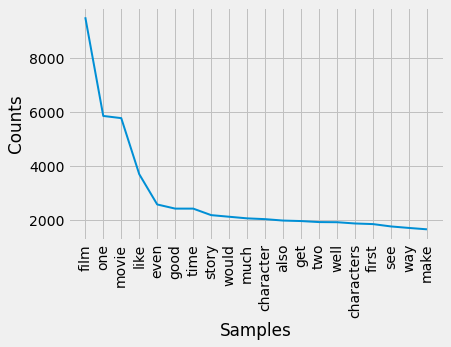

[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049), ('character', 2020), ('also', 1967), ('get', 1949), ('two', 1911), ('well', 1906), ('characters', 1859), ('first', 1836), ('see', 1749), ('way', 1693), ('make', 1642), ('life', 1586), ('really', 1558), ('films', 1536), ('plot', 1513), ('little', 1501), ('people', 1455), ('could', 1427), ('scene', 1397), ('man', 1396), ('bad', 1395), ('never', 1374), ('best', 1333), ('new', 1292), ('scenes', 1274), ('many', 1268), ('director', 1237), ('know', 1217), ('movies', 1206), ('action', 1172), ('great', 1148), ('another', 1121), ('love', 1119), ('go', 1113), ('made', 1084), ('us', 1073), ('big', 1064), ('end', 1062), ('something', 1061), ('back', 1060), ('still', 1047), ('world', 1037), ('seems', 1033), ('work', 1020), ('makes', 992), ('however', 989), ('every', 947), ('though', 940), ('better', 922), ('real', 915), ('audience', 914), 

In [28]:
cleaned_words = [w for w in words if w not in stop_words and w.isalpha()]
freq_dist = nltk.probability.FreqDist(cleaned_words)
freq_dist.plot(20)
plt.show()
print(freq_dist.most_common(100))

In [29]:
# most common words in the movie reviews
nltk.FreqDist(movie_reviews.words()).most_common(15)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595)]

In [30]:
# After cleaning
# most common words in the movie reviews
nltk.FreqDist(cleaned_words).most_common(15)

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049),
 ('character', 2020),
 ('also', 1967),
 ('get', 1949),
 ('two', 1911),
 ('well', 1906)]

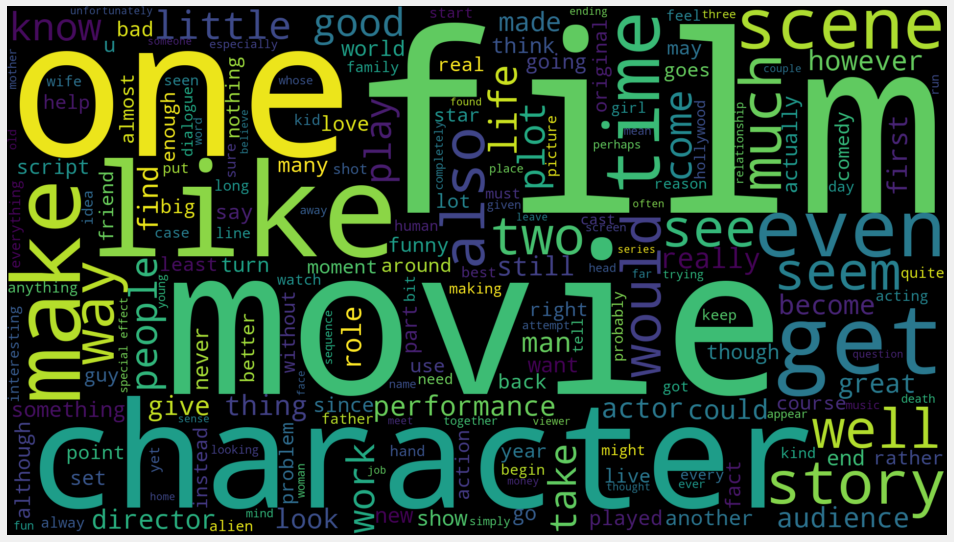

In [31]:
text = " ".join(cleaned_words)
wordcloud = WordCloud(stopwords=stop_words, background_color='black',
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Loading data

In [32]:
df = pd.read_csv('./datasets/IMDB Dataset.csv')

In [33]:
# reading the first 20 reviews
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [34]:
df.shape

(50000, 2)

In [35]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [36]:
df.groupby('sentiment').count()

,review
sentiment,
negative,25000
positive,25000


In [37]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [38]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text.lower()


#Apply function on review column
df['cleaned_review'] = df['review'].apply(denoise_text)

In [39]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."


In [40]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-z0-9\s]','',text)

In [41]:
#Apply function on review column
df['cleaned_review'] = df['cleaned_review'].apply(remove_special_characters)

In [42]:
df

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...


In [43]:
# Steming

In [44]:
#Stemming the text
def stem_text(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
# df['stemmed_review'] = df['cleaned_review'].apply(stem_text)

In [45]:
#lemm the text
def lemmetize_text(text):
    lm = WordNetLemmatizer()
    text= ' '.join([lm.lemmatize(word) for word in text.split()])
    return text
#Apply function on review column
df['lemma_review'] = df['cleaned_review'].apply(lemmetize_text)

In [46]:
df.head()

,review,sentiment,cleaned_review,lemma_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,basically there a family where a little boy ja...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,petter matteis love in the time of money is a ...


In [47]:
#set stopwords to english

#removing the stopwords
def remove_stopwords(text):
    return ' '.join ([w for w in text.split() if w not in stop_words])
    

In [48]:
df['review-without-stopwords'] = df['lemma_review'].apply(remove_stopwords)

In [49]:
df.head()

,review,sentiment,cleaned_review,lemma_review,review-without-stopwords
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other reviewer ha mentioned that af...,one reviewer ha mentioned watching 1 oz episod...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,a wonderful little production the filming tech...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this wa a wonderful way to spend tim...,thought wa wonderful way spend time hot summer...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,basically there a family where a little boy ja...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,petter matteis love in the time of money is a ...,petter matteis love time money visually stunni...


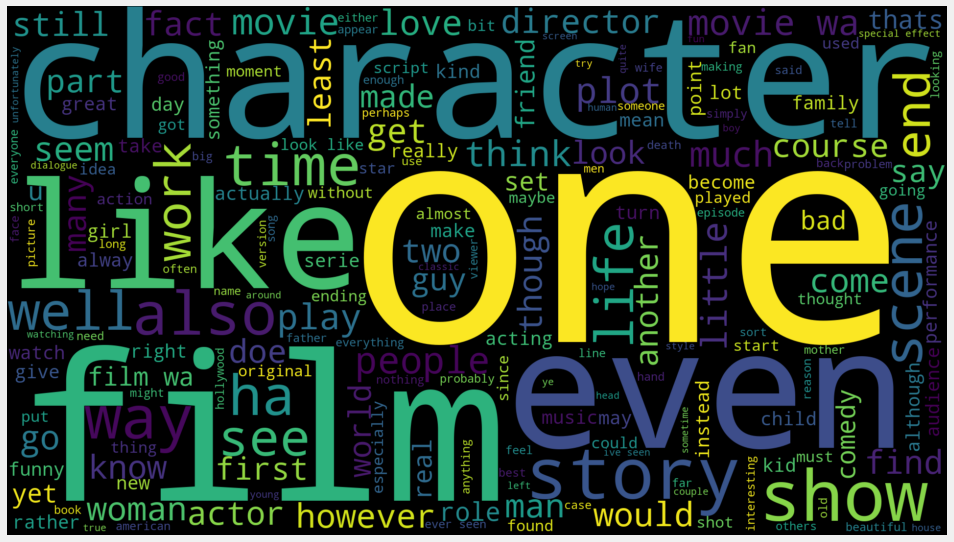

In [50]:
text = " ".join([sent for sent in df['review-without-stopwords']])
wordcloud = WordCloud(stopwords=stop_words, background_color='black',
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [111]:
#split the dataset  
#train dataset
X_train = df['review'][:40000]
y_train = df['sentiment'][:40000]

#test dataset
X_test = df['review'][40000:]
y_test = df['sentiment'][40000:]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(40000,) (40000,)
(10000,) (10000,)


In [112]:
# Bags of words model
# It is used to convert text documents to numerical vectors or bag of words.

In [113]:
#Count vectorizer for bag of words
cv = CountVectorizer(min_df = 0,max_df = 1,binary = False,ngram_range = (1,3))
#transformed train reviews
cv_train_reviews = cv.fit_transform(X_train)
#transformed test reviews
cv_test_reviews = cv.transform(X_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6183315)
BOW_cv_test: (10000, 6183315)


In [114]:
# Term Frequency-Inverse Document Frequency model (TFIDF)
# It is used to convert text documents to matrix of tfidf features.

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

In [61]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(X_train)
#transformed test reviews
tv_test_reviews=tv.transform(X_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6183315)
Tfidf_test: (10000, 6183315)


In [62]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [85]:
#Predicting the model for bag of words train dataset
lr_bow_predict_train=lr.predict(cv_train_reviews)
print(lr_bow_predict_train)
##Predicting the model for tfidf features
lr_tfidf_predict_train=lr.predict(tv_train_reviews)
print(lr_tfidf_predict_train)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']
['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


In [90]:
#Accuracy score for bag of words train data set
lr_bow_score_train = accuracy_score(y_train,lr_bow_predict_train)
print("lr_bow_score_train :",lr_bow_score_train)
#Accuracy score for tfidf features
lr_tfidf_score_train = accuracy_score(y_train,lr_tfidf_predict_train)
print("lr_tfidf_score_train :",lr_tfidf_score_train)

lr_bow_score_train : 0.99625
lr_tfidf_score_train : 0.99625


In [96]:
#Predicting the model for bag of words test dataset
lr_bow_predict_test = lr.predict(cv_test_reviews)
print(lr_bow_predict_test)
##Predicting the model for tfidf features
lr_tfidf_predict_test = lr.predict(tv_test_reviews)
print(lr_tfidf_predict_test)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [98]:
#Accuracy score for bag of words test
lr_bow_score_test = accuracy_score(y_test,lr_bow_predict_test)
print("lr_bow_score_test :",lr_bow_score_test)
#Accuracy score for tfidf features
lr_tfidf_score_test=accuracy_score(y_test,lr_tfidf_predict_test)
print("lr_tfidf_score_test :",lr_tfidf_score_test)

lr_bow_score_test : 0.7676
lr_tfidf_score_test : 0.7659


In [99]:
#Classification report for bag of words 
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.77      0.77      0.77      4993
    Negative       0.77      0.77      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.78      0.75      0.76      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [100]:
# Multinomial Naive Bayes for bag of words and tfidf features
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,y_train)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,y_train)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [101]:
#Predicting the model for bag of words
mnb_bow_predict_train =mnb.predict(cv_train_reviews)
print(mnb_bow_predict_train)
#Predicting the model for tfidf features
mnb_tfidf_predict_train=mnb.predict(tv_train_reviews)
print(mnb_tfidf_predict_train)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']
['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


In [102]:
#Accuracy score for bag of words for training data
mnb_bow_score_train=accuracy_score(y_train,mnb_bow_predict_train)
print("mnb_bow_score_train :",mnb_bow_score_train)
#Accuracy score for tfidf features
mnb_tfidf_score_train =accuracy_score(y_train,mnb_tfidf_predict_train)
print("mnb_tfidf_score_train :",mnb_tfidf_score_train)

mnb_bow_score_train : 0.99625
mnb_tfidf_score_train : 0.99625


In [108]:
#Predicting the model for bag of words test dataset
mnb_bow_predict_test=mnb.predict(cv_test_reviews)
print(mnb_bow_predict_test)
#Predicting the model for tfidf features
mnb_tfidf_predict_test=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict_test)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [110]:
#Accuracy score for bag of words test data
mnb_bow_score_test = accuracy_score(y_test,mnb_bow_predict_test)
print("mnb_bow_score_test :",mnb_bow_score_test)
#Accuracy score for tfidf features
mnb_tfidf_score_test =accuracy_score(y_test,mnb_tfidf_predict_test)
print("mnb_tfidf_score_test :",mnb_tfidf_score_test)

mnb_bow_score_test : 0.7682
mnb_tfidf_score_test : 0.7677


In [105]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [106]:
#Classification report for bag of words 
mnb_bow_report=classification_report(y_test,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(y_test,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.77      0.76      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.77      0.76      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [ ]:
# Separate function has been used to fetch Twitter data and change to CSV. Since the function has a user credition, it was not
# share on this file

In [ ]:
df_tweets = pd.read_csv('./datasets/tweets.csv')

In [ ]:
df_tweets

In [ ]:
df_tweets['cleaned_tweet'] = df_tweets['Tweets'].apply(denoise_text)

In [ ]:
df_tweets['cleaned_tweet'] = df_tweets['cleaned_tweet'].apply(remove_special_characters)
df_tweets

In [ ]:
df_tweets['tweet_without_stopwords'] = df_tweets['cleaned_tweet'].apply(remove_stopwords)

In [ ]:
df_tweets['lemmetized_tweet'] = df_tweets['tweet_without_stopwords'].apply(lemmetiaze_text)

In [ ]:
df_tweets

In [ ]:
text = " ".join([sent for sent in df_tweets['lemmetized_tweet']])
wordcloud = WordCloud(stopwords=stop_words, background_color='black',
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud.png')
plt.show()

In [ ]:

txt= []
for lemma in df_tweets['lemmetized_tweet']:
    txt += lemma.split()
freq_dist = nltk.probability.FreqDist(txt)
freq_dist.plot(30)
plt.show()
print(freq_dist.most_common(100))